In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from lightgbm import LGBMClassifier

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/dubeysachin752/customer-curn/main/train.csv')
test=pd.read_csv('https://raw.githubusercontent.com/dubeysachin752/customer-curn/main/test.csv')
sample=pd.read_csv('https://raw.githubusercontent.com/dubeysachin752/customer-curn/main/test.csv')

In [3]:
train.isna().sum()

ID                     0
STATE                  0
AGE                    0
OCCUPATION             0
INCOME_GROUP           0
CUSTOMER_SINCE         0
LOYALTY_PROGRAM    17824
PAST_PURCHASE          0
PURCHASE               0
dtype: int64

In [4]:
train.columns

Index(['ID', 'STATE', 'AGE', 'OCCUPATION', 'INCOME_GROUP', 'CUSTOMER_SINCE',
       'LOYALTY_PROGRAM', 'PAST_PURCHASE', 'PURCHASE'],
      dtype='object')

In [5]:
train['STATE'].unique()

array(['Uttar Pradesh', 'Madhya Pradesh', 'West Bengal', 'Tamil Nadu',
       'Maharashtra', 'Kerala', 'Goa', 'Karnataka', 'Andhra Pradesh',
       'Telangana', 'Chandigarh', 'Nagaland',
       'Andaman and Nicobar Islands', 'Tripura', 'Delhi',
       'Himachal Pradesh', ' ', 'Puducherry', 'Sikkim', 'Gujarat',
       'Odisha', 'Bihar', 'Punjab', 'Arunachal Pradesh', 'Haryana',
       'Rajasthan', 'Uttarakhand', 'Jammu and Kashmir', 'Assam',
       'Manipur', 'Mizoram', 'Jharkhand', 'Chhattisgarh', 'Meghalaya'],
      dtype=object)

In [6]:
train['STATE'].replace(' ','Other',inplace =True)
test['STATE'].replace(' ','Other',inplace =True)

In [7]:
train['INCOME_GROUP'].unique()

array(['Low', 'High', 'Medium', ' '], dtype=object)

In [8]:
train['INCOME_GROUP'].replace(' ','Other',inplace =True)
test['INCOME_GROUP'].replace(' ','Other',inplace =True)

In [9]:
train['LOYALTY_PROGRAM'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [10]:
most_freq = train['LOYALTY_PROGRAM'].mode()[0]     #dealling with null values
#print(most_freq)
train['LOYALTY_PROGRAM'] = train['LOYALTY_PROGRAM'].fillna(most_freq)
test['LOYALTY_PROGRAM'] = test['LOYALTY_PROGRAM'].fillna(most_freq)

In [11]:
train['OCCUPATION'].unique()

array([' ', 'Salaried', 'Self employed', 'Business'], dtype=object)

In [12]:
train['OCCUPATION'].replace(' ','Unemployed',inplace =True)
test['OCCUPATION'].replace(' ','Unemployed',inplace =True)

In [13]:

train['PAST_PURCHASE'].unique()

array([ 4937, 10834,  8610, ..., 17084, 23510, 29447])

In [14]:
train['PAST_PURCHASE'].replace(' ',0,inplace =True)
test['PAST_PURCHASE'].replace(' ',0,inplace =True)

In [15]:
train['CUSTOMER_SINCE'].replace(2008,1,inplace =True)
train['CUSTOMER_SINCE'].replace(2009,2,inplace =True)
train['CUSTOMER_SINCE'].replace(2010,3,inplace =True)
train['CUSTOMER_SINCE'].replace(2011,4,inplace =True)
train['CUSTOMER_SINCE'].replace(2012,5,inplace =True)
train['CUSTOMER_SINCE'].replace(2013,6,inplace =True)
train['CUSTOMER_SINCE'].replace(2014,7,inplace =True)
train['CUSTOMER_SINCE'].replace(2015,8,inplace =True)
train['CUSTOMER_SINCE'].replace(2016,9,inplace =True)
train['CUSTOMER_SINCE'].replace(2017,10,inplace =True)
train['CUSTOMER_SINCE'].replace(2018,11,inplace =True)
train['CUSTOMER_SINCE'].replace(2019,12,inplace =True)



test['CUSTOMER_SINCE'].replace(2008,1,inplace =True)
test['CUSTOMER_SINCE'].replace(2009,2,inplace =True)
test['CUSTOMER_SINCE'].replace(2010,3,inplace =True)
test['CUSTOMER_SINCE'].replace(2011,4,inplace =True)
test['CUSTOMER_SINCE'].replace(2012,5,inplace =True)
test['CUSTOMER_SINCE'].replace(2013,6,inplace =True)
test['CUSTOMER_SINCE'].replace(2014,7,inplace =True)
test['CUSTOMER_SINCE'].replace(2015,8,inplace =True)
test['CUSTOMER_SINCE'].replace(2016,9,inplace =True)
test['CUSTOMER_SINCE'].replace(2017,10,inplace =True)
test['CUSTOMER_SINCE'].replace(2018,11,inplace =True)
test['CUSTOMER_SINCE'].replace(2019,12,inplace =True)

In [16]:
train['PURCHASE'].replace('No',0,inplace =True)
train['PURCHASE'].replace('Yes',1,inplace =True)

In [17]:
from sklearn import preprocessing 

cat_columns = []
for col in train.select_dtypes('object').columns:
    print(col)
    cat_columns.append(col)
    le = preprocessing.LabelEncoder()
    train[col] = le.fit_transform(train[col])

STATE
OCCUPATION
INCOME_GROUP
LOYALTY_PROGRAM


In [18]:
cat_columns = []
for col in test.select_dtypes('object').columns:
    #print(col)
    cat_columns.append(col)
    le = preprocessing.LabelEncoder()
    test[col] = le.fit_transform(test[col])

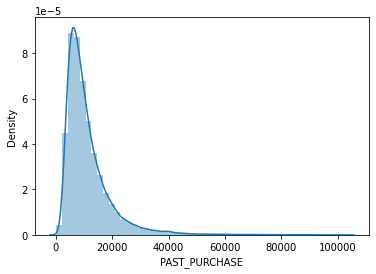

In [19]:
 sns.distplot(train['PAST_PURCHASE'])

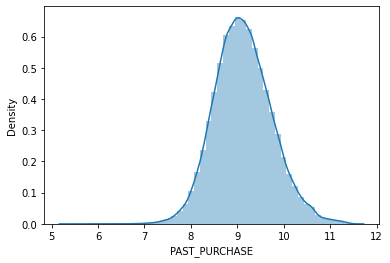

In [20]:
train['PAST_PURCHASE']=np.log(train['PAST_PURCHASE'])
sns.distplot(train['PAST_PURCHASE'])

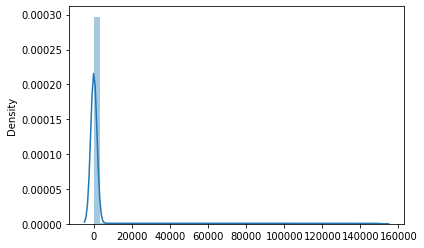

In [21]:
sns.distplot(train)

In [22]:
X=train.drop(['PURCHASE','ID'],axis=1)
y=train['PURCHASE']

In [23]:
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,  
                                                       random_state=100,stratify=y)

In [24]:
X_train.shape,X_test.shape

((120000, 7), (30000, 7))

In [25]:
y_train.shape,y_test.shape

((120000,), (30000,))

In [26]:
y_train.value_counts()/len(y_train)

0    0.763583
1    0.236417
Name: PURCHASE, dtype: float64

In [27]:
y_test.value_counts()/len(y_test)

0    0.763567
1    0.236433
Name: PURCHASE, dtype: float64

In [28]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [29]:
from collections import Counter

A) **SMOTE Technique**

In [30]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 91630, 1: 28370})
After Counter({1: 91630, 0: 91630})


ADASYN Technique

In [31]:
from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0: 91630, 1: 28370})
After Counter({0: 91630, 1: 91494})


In [32]:
from imblearn.combine import SMOTEENN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 91630, 1: 28370})
After Counter({1: 57978, 0: 47711})


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score

In [34]:
model=LogisticRegression()          #model_1 logistic regsn
model.fit(X_train,y_train)
pred_logistics=model.predict(X_test)

In [44]:
roc_auc_score(y_test,pred_logistics)

0.5371729912929059

In [45]:
       #model_1 logistic smote
model.fit(X_train_sm,y_train_sm)
pred_logistics_sm=model.predict(X_test)

In [46]:
roc_auc_score(y_test,pred_logistics_sm)

0.6596333124201119

In [47]:
model.fit(X_train_ada,y_train_ada)
pred_logistics_ada=model.predict(X_test)
roc_auc_score(y_test,pred_logistics_ada)

0.6596144084795119

In [48]:
model.fit(X_train_smenn,y_train_smenn)
pred_logistics__smenn=model.predict(X_test)


In [49]:
roc_auc_score(y_test,pred_logistics__smenn)

0.6658074262002684

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
pred_tree=tree_model.predict(X_test)


In [52]:
roc_auc_score(y_test,pred_tree)

0.6027574174640814

In [53]:
       #model_1 logistic smote
tree_model.fit(X_train_sm,y_train_sm)
tree_model_sm=tree_model.predict(X_test)

In [54]:
roc_auc_score(y_test,tree_model_sm)

0.6019845377151956

In [55]:
tree_model.fit(X_train_ada,y_train_ada)
tree_model_ada=tree_model.predict(X_test)

In [56]:
roc_auc_score(y_test,tree_model_ada)

0.6036548730429137

In [82]:
from xgboost import XGBClassifier     #model_2 XGBoost

xgb = XGBClassifier(random_state=101)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [83]:
pred_xgb=xgb.predict(X_test)
roc_auc_score(y_test,pred_xgb)

0.5669180787163534

In [84]:
xgb.fit(X_train_sm,y_train_sm)
pred_xgb_sm=xgb.predict(X_test)


In [85]:
roc_auc_score(y_test,pred_xgb_sm)

0.6939610344701586

In [86]:
xgb.fit(X_train_ada,y_train_ada)
pred_xgb_ada=xgb.predict(X_test)

In [87]:
roc_auc_score(y_test,pred_xgb_ada)

0.6927280100964953

In [64]:
xgb.fit(X_train_smenn,y_train_smenn)
pred_xgb_smenn=xgb.predict(X_test)

In [65]:
roc_auc_score(y_test,pred_xgb_smenn)

0.702484739122327

In [66]:
from sklearn.ensemble import RandomForestClassifier      #model_3 RFoost

rand_forst=RandomForestClassifier(random_state=101)
rand_forst.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [67]:
pred_rand=rand_forst.predict(X_test)
roc_auc_score(y_test,pred_rand)

0.6043345040195292

In [68]:
rand_forst.fit(X_train_sm,y_train_sm)
pred_rand_sm=rand_forst.predict(X_test)
roc_auc_score(y_test,pred_rand_sm)

0.6261281256594877

In [69]:
rand_forst.fit(X_train_ada,y_train_ada)
pred_rand_ada=rand_forst.predict(X_test)


In [70]:
roc_auc_score(y_test,pred_rand_ada)

0.6259635447460644

In [71]:
rand_forst.fit(X_train_smenn,y_train_smenn)
pred_rand_smemm=rand_forst.predict(X_test)

In [73]:
roc_auc_score(y_test,pred_rand_smemm)

0.6880382880160569

In [78]:
cat_col=['STATE','OCCUPATION','INCOME_GROUP','LOYALTY_PROGRAM' ]
cat_features_index = [i for i,col in enumerate(X.columns) if col in cat_columns]
cat_features_index

[0, 2, 3, 5]

In [74]:
from lightgbm import LGBMClassifier

In [75]:
lgb = LGBMClassifier()                #model_5 LGboost
lgb.fit(X_train, y_train)
y_pred_lg = lgb.predict(X_test)


In [77]:
roc_auc_score(y_test,y_pred_lg)

0.5775405669856474

In [78]:
lgb.fit(X_train_sm, y_train_sm)    #somte
y_pred_lg_sm = lgb.predict(X_test)
roc_auc_score(y_test,y_pred_lg_sm)


0.6486046186878233

In [79]:
lgb.fit(X_train_ada, y_train_ada)    #somte
y_pred_lg_ada = lgb.predict(X_test)
roc_auc_score(y_test,y_pred_lg_ada)


0.6434604696322304

In [80]:
lgb.fit(X_train_smenn, y_train_smenn)    #somte
y_pred_lg_smenn = lgb.predict(X_test)
roc_auc_score(y_test,y_pred_lg_smenn)


0.703288536646112

In [81]:
import pickle

In [88]:
with open('Churn_model_pickle.pkl','wb') as file:
    pickle.dump(xgb,file)